Como primer paso, importo las diferentes bibliotecas que utilizaré a lo largo del código. Las bibliotecas que importaré son las siguientes, con ellas podré realizar visualizaciones y conectarme a base de datos en SQL

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector

A continuación, creo una variable llamada conexion y le asigno los argumentos necesarios para conectarme a una base de datos SQL. Utilizo la biblioteca mysql.connector para establecer la conexión:

In [102]:
# variable conexion, para conectarme con base de datos SQL
conexion = mysql.connector.connect(user='root', password = 'RivadaviaFunes354%', host='127.0.0.1',database='operaciones')

Luego creo una variable llamada tablas y utilizo la sentencia SHOW TABLES para ver las diferentes tablas de la base de datos con la que voy a trabajar. Para ello utilizo la biblioteca pandas, y ejecuto la consulta.

In [103]:
## ver tablas que forman parte de mi database
tablas = pd.read_sql("SHOW TABLES",conexion)

C:\Users\lmich\AppData\Local\Temp\ipykernel_6764\2179868065.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tablas = pd.read_sql("SHOW TABLES",conexion)


Luego siguiendo con pandas, ejecuto diferentes consultas para acceder a los datos de las tablas y los mismo quedarán almacenados en distintos DataFrames.

In [104]:
# llamar a pandas para leer mis diferentes tablas de SQL
transacciones = pd.read_sql('SELECT * FROM transacciones',conexion)
products = pd.read_sql('SELECT * FROM products', conexion)
companies = pd.read_sql('SELECT * FROM companies',conexion)
users = pd.read_sql('SELECT * FROM users_gral',conexion)
credits_cards = pd.read_sql('SELECT * FROM credit_cards', conexion)

C:\Users\lmich\AppData\Local\Temp\ipykernel_6764\3696510287.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transacciones = pd.read_sql('SELECT * FROM transacciones',conexion)
C:\Users\lmich\AppData\Local\Temp\ipykernel_6764\3696510287.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products = pd.read_sql('SELECT * FROM products', conexion)
C:\Users\lmich\AppData\Local\Temp\ipykernel_6764\3696510287.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  companies = pd.read_sql('SELECT * FROM companies',conexion)
C:\Use

Después, ejecuto la función print() para cada una de mis tablas, con el fin de ver cómo están compuestas, sus tipos de datos y evaluar si es necesario hacer alguna modificación. Para ello he utilizado el método info y tambien el método .head(5) para ver las primeras 5 filas de datos:

In [105]:
print(transacciones.info())
transacciones.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 46.0+ KB
None


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980


En el caso de la tabla transacciones, he realizado una modificación del tipo de dato de la columna user_id. Cambio el tipo de dato de esta columna a object utilizando el método astype() de pandas

In [106]:
# veo que mi columna de user_id tiene tipo de dato float y quiero convertirlo a object, ya que no es un campo numerico en cuanto que no lo utilizare para cuentas de promedio, y de ese tipo
transacciones['user_id']=transacciones['user_id'].astype(object)
print(transacciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    object        
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 46.0+ KB
None


In [107]:
print(products.info())
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    int64  
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None


,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2,WH--5
2,100,south duel,40.43,#6d6d6d,3,WH--95
3,11,Karstark Dorne,49.70,#141414,3,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2,WH--7


In [108]:
print(companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


In [109]:
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    int64 
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB
None


,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,"Aug 23, 1992",United States,Des Moines,59464,903 Sit Ave
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,"Apr 29, 1998",United States,Columbus,56518,736-2063 Tellus St.
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,"Feb 18, 1989",United States,Kailua,77417,Ap #545-2244 Erat. Rd.
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,"Sep 26, 1998",United States,Sandy,31564,341-2821 Ultrices Av.


En el caso de la tabla users, también realizo algunas modificaciones. Ademas de cambiar la columna id a object, convierto la columna birth_date a un formato de fecha utilizando pd.to_datetime(). 

In [110]:
# aqui tambien corvertire el tipo de dato del id de user_id, para pasarlo a objetc
# y tambien el birth_date a formato fecha
users['id'] = users['id'].astype(object)
users['birth_date'] = pd.to_datetime(users['birth_date'],format='%b %d, %Y')
# para calcula la edad de los users utilizo
users['edad'] = pd.Timestamp.now().year - users['birth_date'].dt.year
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    object        
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
 10  edad         275 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 22.7+ KB
None


,id,name,surname,phone,email,birth_date,country,city,postal_code,address,edad
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,39
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Des Moines,59464,903 Sit Ave,32
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Columbus,56518,736-2063 Tellus St.,26
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Kailua,77417,Ap #545-2244 Erat. Rd.,35
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Sandy,31564,341-2821 Ultrices Av.,26


In [111]:
print(credits_cards.info())
credits_cards.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    int64 
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    object
 5   cvv            275 non-null    object
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: int64(1), object(8)
memory usage: 19.5+ KB
None


,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24


In [112]:
# aqui tambien corvertire el tipo de dato del id de user_id, para pasarlo a objetc
credits_cards['user_id'] = credits_cards['user_id'].astype(object)
print(credits_cards.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    object
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    object
 5   cvv            275 non-null    object
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: object(9)
memory usage: 19.5+ KB
None


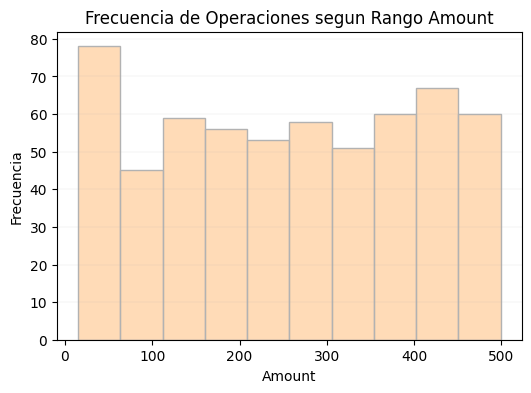

In [113]:
## EJERCICIO 1
## Una variable numèrica.
plt.figure(figsize=(6,4))
sns.histplot(data=transacciones, x='amount',bins=10, color = '#ffcf9f', edgecolor ='#b2b2b2')
# Definición formato ejes, etiquetas y cuadriculas
plt.grid(True,which='both', linestyle='--', linewidth=0.14, axis='y')
plt.title('Frecuencia de Operaciones segun Rango Amount') 
plt.xlabel('Amount')
plt.ylabel('Frecuencia') 
plt.show()

Para este ejercicio he optado por un gráfico de tipo hisplot() de la biblioteca seaborn. 

Respecto a las conclusiones de la visualización, se puede ver que la mayor frecuencia se da en el primer rango, que va desde € 15,05 a € 63,46. En ese rango hay un total de 78 operaciones. Luego a partir de ahí va alternando subas y bajas pero ninguna llega a lo que llega ese primer rango.

Sería importante analizar con los departamentos correspondientes como aumentar la frecuencia en aquellas operaciones de mayor monto. Incrementar el volumen en los últimos rangos ayudaría significativamente a incrementar las ventas de la empresa, y además mejoraría la eficiencia, ya que un elevado número de operaciones de bajo importe conlleva ciertos gastos, lo que afecta negativamente la rentabilidad final de cada operación de bajo importe.

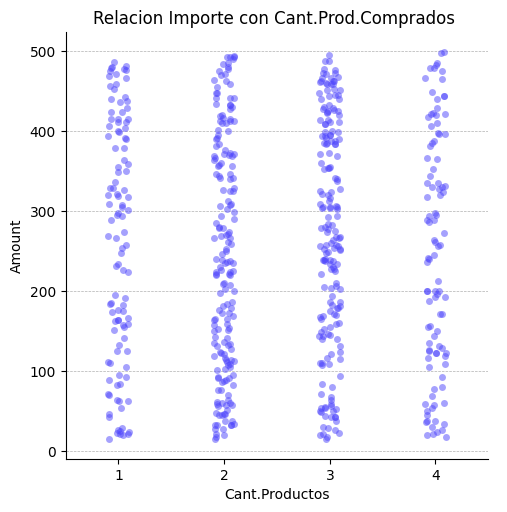

In [114]:
## EJERCICIO 2----en caso de no ir esta poner la precio y peso
## Dos variables numéricas.
transacciones['cant_prod'] = transacciones['product_ids'].apply(lambda x: len(x.split(',')))
sns.catplot(data=transacciones,y='amount',x='cant_prod', color = '#4d44fc', alpha=0.5)
# Definición formato ejes, etiquetas y cuadriculas
plt.grid(True,which='both',linestyle='--',linewidth=0.5, axis='y')
plt.title('Relacion Importe con Cant.Prod.Comprados ')
plt.xlabel('Cant.Productos')
plt.ylabel('Amount')
plt.show()

Para comenzar utilizo el método apply() junto con una función lambda. Esta función me permite considerar la coma como delimitador y, con el método len(), contar la cantidad de productos en cada operación. La aplicación de la formula me agregará una "nueva columna" a la tabla transacciones, con la cant de productos, esa columna agregada, al ser cantidad de productos, seria una variable numerica que en adelante utilizaré. 
La intención aquí era analizar la columna product_ids del archivo base original y contar la cantidad de diferentes productos comprados. El objetivo era determinar si existía una relación entre la cantidad de productos comprados y el monto gastado. 

Sin embargo, al utilizar catplot, pude concluir que no hay una relación directa. Los usuarios pueden haber comprado un solo tipo de producto y haber gastado poco (cerca de 15 euros) o mucho (cerca de 500 euros). De la misma manera, pueden haber comprado 4 tipos de productos diferentes y haber gastado poco también. Por lo tanto, la cantidad de productos no está asociada con el monto gastado en cada operación.

Como segunda observación, se puede notar que la mayoría de las operaciones comprenden 2 o 3 productos. Aquellos puntos que indican 1 y 4 productos muestran una menor concentración. Además, por la concentración de los puntos, se puede observar que la mayor concentración existe para operaciones con 3 productos en importes que oscilan entre 390 aprox y 500 euros.

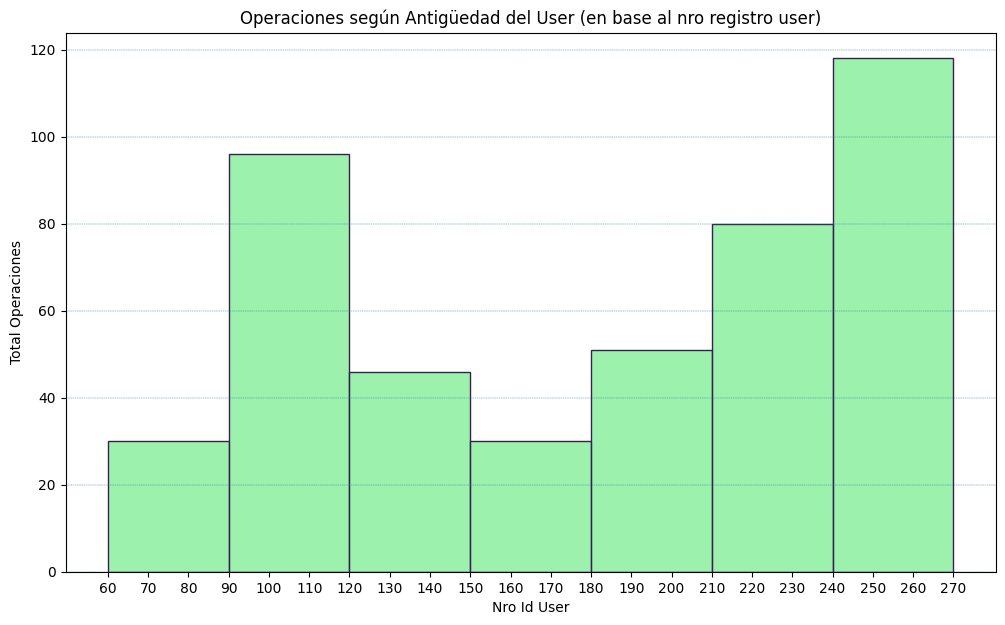

In [115]:
## EJERCICIO 3
## Una variable categòrica.
cantbins = np.arange(60, 280,30) 

# Definición formato ejes, etiquetas y cuadriculas.
plt.figure(figsize=(12,7))
plt.title('Operaciones según Antigüedad del User (en base al nro registro user)')
plt.xlabel('Nro Id User')
plt.ylabel('Total Operaciones')
plt.xticks(range(60,280,10))
sns.histplot(data=transacciones, x='user_id', bins = cantbins, alpha=0.7, edgecolor='#3B1E54', color ='#73EC8B')
plt.grid(True, which='major', linestyle='--', linewidth=0.3, color='#227B94', axis='y');

Para el siguiente análisis, he utilizado histplot para visualizar los user_id, que representan el número de registro de los usuarios en el sistema. Mi objetivo es poder analizar si la antigüedad del usuario repercute en algo o no, respecto al número de operaciones.
Al observar el histplot, se puede notar que los usuarios registrados más recientemente (con user_id más altos) tienden a realizar un mayor número de operaciones. Por el contrario, los usuarios con user_id más bajos, que se registraron hace más tiempo, tienden a realizar menos operaciones. El hisplot muestra un incremento en el número de operaciones a partir de los rangos que comienzan en el usuario 180, no obstante ello hay una excepcion en otro rango de usuarios que va del 90 al 120, donde tambien se puede ver un numero importante de operacoines. Este patrón sugiere que, en general, los usuarios más recientes son más activos, aunque existen algunas excepciones entre los usuarios más antiguos.

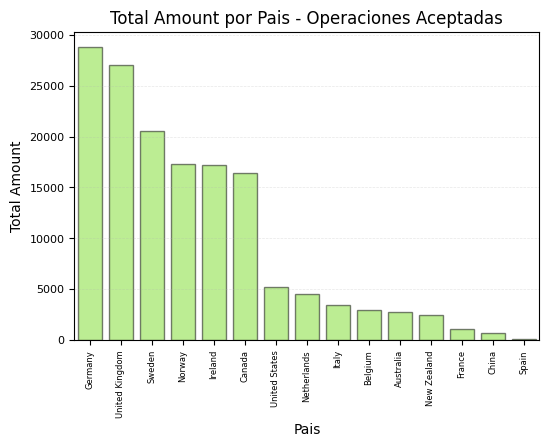

In [116]:
## Ejercicio 4
#variable categorica y numerica

# realizo un merge para obtener los datos de ambas tablas.
transacciones_cia = pd.merge(transacciones,companies,left_on='business_id', right_on='company_id')
# realizo un groupby para luego tener las barras ordenadas, y un reset index para convertirlo en DataFrame.
datos_agrup = transacciones_cia.groupby('country')['amount'].sum().sort_values(ascending=False).reset_index()
# Definicion tamaño de gráfico y gráfico a utilizar.
plt.figure(figsize=(6,4))
sns.barplot(data=datos_agrup,x='country', y='amount',color='#77fb0a', edgecolor='black', alpha =0.5)
# Definición formato ejes, etiquetas y cuadriculas.
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', alpha=0.3)
plt.title('Total Amount por Pais - Operaciones Aceptadas')
plt.xlabel('Pais')
plt.ylabel('Total Amount')
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.show()

In [117]:
datos_agrup

,country,amount
0,Germany,28815.98
1,United Kingdom,27073.17
2,Sweden,20588.59
3,Norway,17286.71
4,Ireland,17193.12
5,Canada,16448.52
6,United States,5256.05
7,Netherlands,4554.32
8,Italy,3427.03
9,Belgium,2965.92


Como paso inicial he realizado un merge entre tabla transacciones con tabla compañia, para obtener el país desde la tabla compañia. Luego, agrupé los datos por país utilizando group by, calculando la suma de la columna amount. Ordené los valores utilizando sort_values para que las barras en el gráfico aparezcan ordenadas. Finalmente, apliqué reset_index para convertir los resultados en un DataFrame y poder graficarlos con Seaborn.

Para este ejercicio he aplicado un gráfico de tipo barplot. La idea es mostrar el total acumulado de amount por pais, solo de las operaciones aceptadas. Como se puede ver, en solo 6 de los 15 paises se centra la mayor cantidad de ventas y/o recaudacion(Alemania, Irlanda, Noruega, Canada, United Kingdom, Suecia). 

Habria que analizar con departamento de Marketing cuales podrían ser las razones por las cuales en paises tan importantes a nivel mundial como Estados Unidos y China no se logran incrementar las ventas.

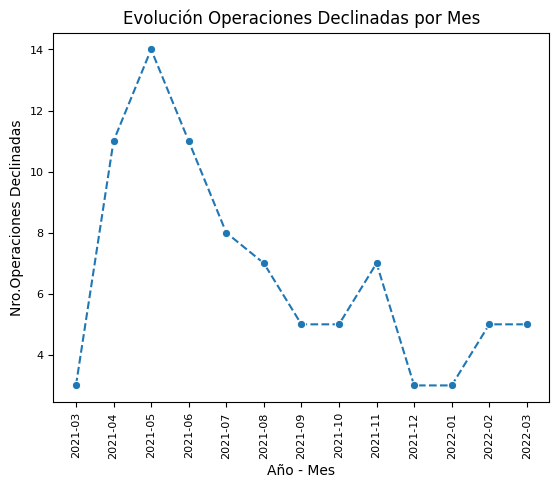

In [118]:
##- Ejercicio 5
##Dos variables categóricas
transacciones_cia = transacciones_cia.sort_values(by='timestamp',ascending=True)
transacciones_cia['año_mes'] = transacciones_cia['timestamp'].dt.to_period('M')
operaciones_declined = transacciones_cia[transacciones_cia['declined']==1].groupby('año_mes').size().reset_index(name='count')
sns.lineplot(x=operaciones_declined['año_mes'].astype(str), y=operaciones_declined['count'], marker='o', linestyle='--')
# Definición formato ejes, etiquetas, títutlos y cuadriculas.
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title('Evolución Operaciones Declinadas por Mes')
plt.xlabel('Año - Mes')
plt.ylabel('Nro.Operaciones Declinadas')
plt.show()

Para este ejercico he utilizao un lineplot() para poder trazar una linea y ver el comportamiento que ha tenido a lo largo del tiempo respecto a operaciones declinadas. Para ello en primer lugar ordener el DataFrame, y luego cree una columna para que me tomara solo el año y el mes de la columna timestamp, para ello he utilzado la funcion de pandas .dt.to_period('M')

Respecto al gráfico se puede observar como en el período inicial la empresa tenía las operaciones declinadas bastante descontroladas, con un número considerablemente alto. Sin embargo, luego de optimizar procesos internos en la empresa, han aplicado medidas correctivas, longrando encauzar y reducir significativamente el número de operaciones declinadas. 

Se presentaron picos en tres meses específicos: abril, mayo y junio, en los cuales las operaciones declinadas superaron las 10. A partir de julio, se empieza a evidenciar una tendencia decreciente, la cual se confirma en los meses posteriores.

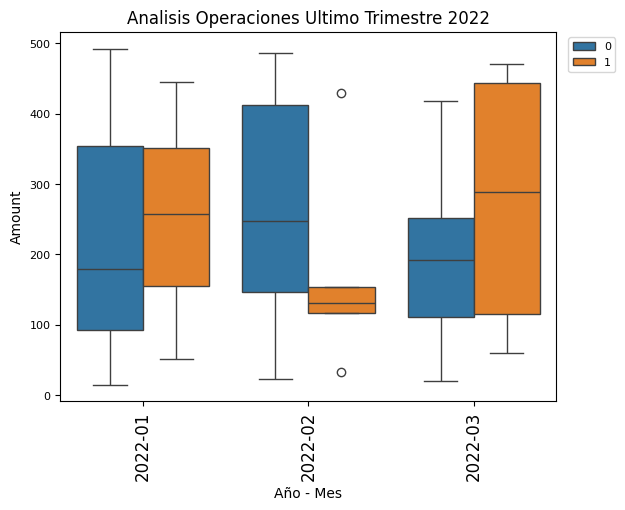

In [119]:
## Ejercicio 6
## Tres variables.

sns.boxplot(data=transacciones_cia[transacciones_cia['timestamp'].dt.year==2022], x='año_mes', y='amount',hue='declined')
# Definición formato ejes, etiquetas, títutlos y cuadriculas.
plt.yticks(fontsize=8)
plt.xticks(rotation=90, fontsize=12)
plt.title('Analisis Operaciones Ultimo Trimestre 2022')
plt.xlabel('Año - Mes')
plt.ylabel('Amount')
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1), fontsize=8)
plt.show()

La intencion en este gráfico ha sido analizar el periodo mas reciente, más precisamente el último trimestre de actividad de la compañia. Por lo tanto, la relacion entre Total Amount, el mes correspodiente y si la operación fue aceptada o declinada.

Lo primero que llama la atención es la amplitud de la caja (rango intercuartílico) de las "operaciones declinadas" en el último mes (marzo). Mientras que en febrero la caja, además de estar ubicada en un rango inferior (es decir, operaciones rechazadas de importe bajo), estaba bien acotada, indicando que los valores no estaban dispersos (con la excepción de dos valores atípicos: uno muy por debajo y otro muy por encima), la caja del último mes ("operaciones declinadas") muestra una gran amplitud. Es considerablemente más amplia que la de los otros dos meses. Esto podría ser una señal de que las operaciones declinadas se han descontrolado, abarcando desde valores más bajos hasta más altos.

Siguiendo con el último mes, otro punto a destacar es que, al observar las "operaciones aceptadas", los valores máximos se encuentran en el nivel más bajo respecto a los meses anteriores. Esto podría ser una señal de alarma. Se puede observar que el rango intercuartílico (el 50% de las operaciones aceptadas) está menos disperso, ya que la caja es más compacta y los valores están más concentrados. Sin embargo, estos valores se encuentran en un rango inferior en comparación con los meses anteriores. Aunque hay operaciones aceptadas de importes más altos, estas están dispersas, lo cual se puede observar en la extension del bigote superior, que muestra el 25% de las operaciones con valores que no llegan a ser atípicos pero que están dispersos.

Respecto a la mediana, podemos observar que en casi todas las cajas, la mediana se encuentra en el centro de la caja. Esto indica que los valores dentro de ese rango están equilibrados, sin valores extremadamente bajos o altos que puedan causar sesgo y desplazar la mediana hacia un extremo u otro. Una excepción a esto se puede ver en la caja del primer mes analizado, enero de 2022, donde la mediana se inclina hacia los rangos inferiores. Es decir que si bien se trata del punto medio de todos los valores, hay valores considerablemente más bajos que hacen más fuerza, es decir que influyen más traslandando "visualmente" la mediana hacia rangos inferiores.

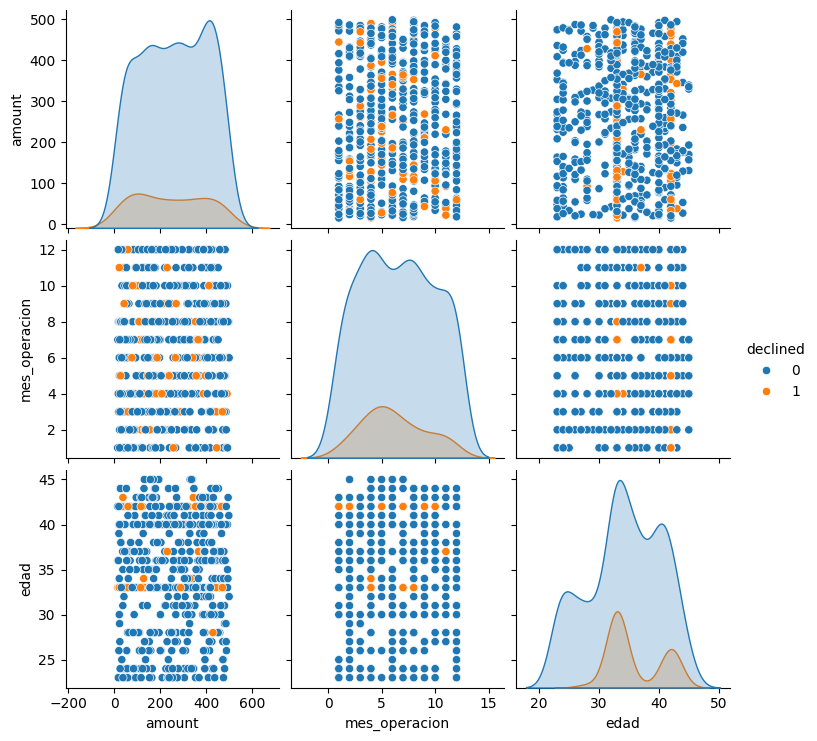

In [120]:
transacciones_cia['mes_operacion'] = transacciones_cia['timestamp'].dt.month
transacciones_cia_users = pd.merge(transacciones_cia, users, left_on='user_id', right_on='id')
sns.pairplot(data=transacciones_cia_users, vars=['amount', 'mes_operacion', 'edad'],hue='declined')
plt.show()

Repecto a este ejercicio se puede ver en rango de edad de usuarios, que las operaciones declinadas comienzas a aparecer a partir de usuarios cercanos a de 30 aprox en adelante. Luego hay operaciones para un usuario(s) de aprox 32 años y de 42 que han tenido operaciones declinadas con diversos importes, de importes bajos y altos.

Para edades, inferiores a 30 años practicamente no hay operaciones declinadas, solo uno con 28 años.

En todos los meses hay operaciones realizadas y operaciones declinadas, pero se puede ver que el mes de Diciembre posiblemente es el que menos operaciones declinadas tiene.

Luego se puede observar que respecto a la edad de los usuarios , la mayor concentración se da en el rango de los 30 a 35 años.
Respecto a las operaciones, se puede ver que en el mes de Abril,Mayo es cuando se da el pico máximo de operaciones (lo podemos comprobar haciendo transacciones_cia_users.groupby('año_mes').size())
